### 📊 # 911 Calls Capstone Project

### 📊 Для этого завершающего проекта мы будем анализировать некоторые данные о вызовах службы экстренной помощи из Kaggle.  [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Данные содержат следующие поля:
* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Просто используйте этот notebook и попробуйте выполнить задания / ответить на вопросы, выделенные жирным шрифтом, используя свои навыки работы с Python и Data Science!

### 📊 ## Данные и настройка

### 📊 ____
** Импортируйте numpy и pandas **

In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd

### 📊 ** Импортируйте библиотеки визуализации и установите %matplotlib inline. **

In [2]:
# Импорт необходимых библиотек
import matplotlib.pyplot as plt
import seaborn as sns

### 📊 **Прочитайте файл csv как дата сет с именем df**

In [3]:
# Загрузка данных о вызовах 911
df = pd.read_csv('911.csv')

### 📊 **Проверьте информацию info() из df**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### 📊 **Покажите первые пять сток от df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### 📊 ## Основные вопросы

### 📊 **Каковы 5 лучших почтовых индексов для звонков в 911?**

In [7]:
df['zip'].value_counts().head()

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

### 📊 **Каковы первые 5 городов (twp) для звонков в службу 911?**

In [8]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


In [9]:
df['twp'].value_counts().head()

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### 📊 **Взгляните на столбец «title», сколько там уникальных элементов заголовков?**

In [11]:
df['title'].nunique()

110

110

### 📊 ## Создание новых признаков

### 📊 ** В столбце title перед кодом заголовка указаны «Причины/Отделы» ("Reasons/Departments"). Это EMS, Fire и Traffic. Используйте метод .apply() с лямбда-выражением создав свою функцию, чтобы создать новый столбец с именем «Reasons», содержащий это строковое значение.**

**Например, если значением столбца заголовка является EMS: BACK PAINS/INJURY , значением столбца Reason будет EMS. **

In [14]:
df['title']

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object

In [19]:
df['title'].apply(lambda x: x.split(':')).head(1)

0    [EMS,  BACK PAINS/INJURY]
Name: title, dtype: object

['EMS', ' BACK PAINS/INJURY']

In [22]:
df['title'].apply(lambda x: x.split(':')[0]).head(1)

0    EMS
Name: title, dtype: object

In [23]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [24]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire


In [12]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire


### 📊 **Какова наиболее распространенная причина (Reason) звонков в службу экстренной помощи, основанная на новом столбце?**

In [25]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

### 📊 **Используйте seaborn, чтобы создать countplot вызовов службы 911 по столбцу Reason. **

<Axes: xlabel='Reason', ylabel='count'>

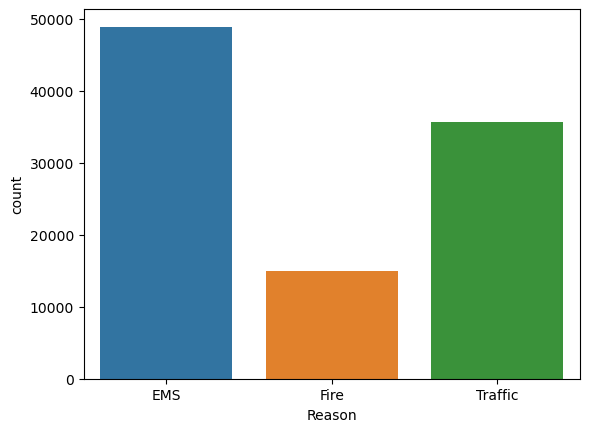

In [26]:
# Визуализация данных
sns.countplot(data=df, x='Reason')

<AxesSubplot:xlabel='Reason', ylabel='count'>

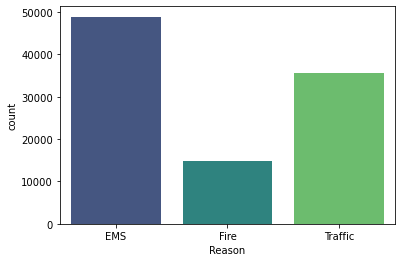

### 📊 ___
**Теперь давайте сосредоточимся на данных о времени. Каков тип данных объектов в столбце timeStamp?**

In [28]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS


In [32]:
type(df['timeStamp'][0])

str

str

### 📊 **Вы можете заметить, что эти временные метки по-прежнему являются строками. Используйте [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) для преобразования столбца из строк в объекты DateTime.**

In [33]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS


In [38]:
# функция pd.to_datetime() достаточно гибкая и не требует наличия всех компонентов даты (день, месяц, год, часы, минуты, 
# секунды). Ты можешь использовать лишь часть этих данных, и pandas постарается интерпретировать их автоматически.
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [40]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS


In [39]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

### 📊 **Теперь вы можете получить определенные атрибуты из объекта Datetime, вызвав их. Например:**

    time = df['timeStamp'].iloc[0]
    time.hour

****Вы можете использовать метод tab в Jupyter для изучения различных атрибутов, которые вы можете вызывать. Теперь, когда столбец timestamp на самом деле является объектом DateTime, используйте .apply() для создания 3 новых столбцов с именами Hour, Month и Day of Week. Вы создадите эти столбцы на основе столбца timeStamp, ссылайтесь на решения, если вы застряли на этом шаге.**

In [56]:
time = df['timeStamp'].iloc[0]
# time = df['timeStamp'][0] можно еще так и все нижние методы так же будут работать, но при нажатии tab подсказки
# то есть доступные методы не будут работать, а с iloc[] работают
print(time.hour)
print(time.date())
print(time.day)
print(time.day_name())
print(time.day_of_week)
print(time.dayofweek)
print(time.month)

17
2015-12-10
10
Thursday
3
3
12


In [107]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.day_of_week)

In [108]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3


### 📊 

### 📊 **Обратите внимание, что День недели представляет собой целое число от 0 до 6. Используйте .map() с этим словарем, чтобы сопоставить фактические имена строк с днем недели:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [109]:
# Метод .map() работает следующим образом: он берет каждое значение из столбца и ищет его соответствие в словаре. 
# Если находит совпадение, заменяет это значение на соответствующее из словаря.
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

#2 через apply
# df['Day of Week'].apply(lambda x: dmap[x])

In [110]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu


### 📊 **Теперь используйте seaborn, чтобы создать график столбца «Day of Week» в контексте столбца «Reason».**

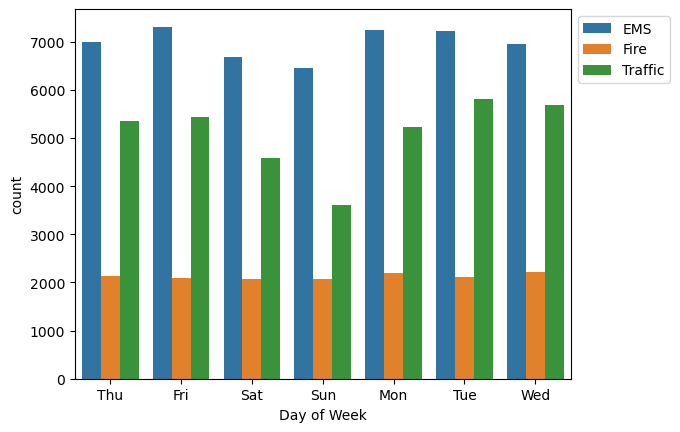

In [112]:
# Визуализация данных
# bbox_to_anchor=(1,1) выводит легенду за рамки графика
sns.countplot(data=df, x='Day of Week', hue='Reason')
plt.legend(bbox_to_anchor=(1, 1))

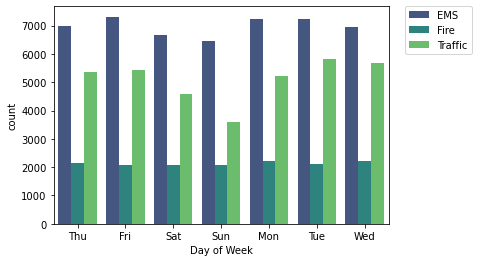

### 📊 **Теперь сделайте то же самое для месяца:**

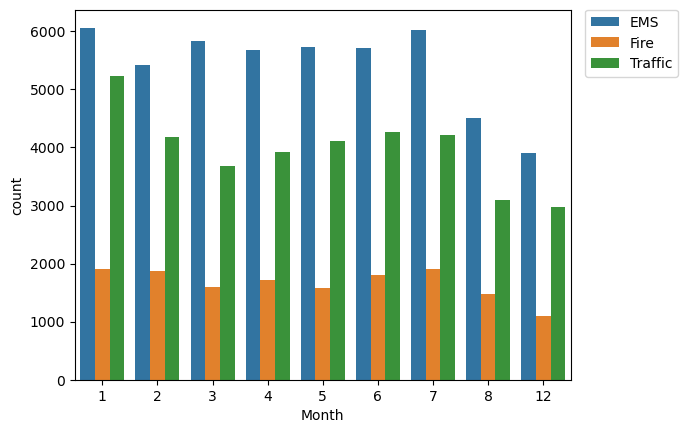

In [125]:
# Визуализация данных
sns.countplot(data=df, x='Month', hue='Reason')
plt.legend(bbox_to_anchor=(1.23, 1.02))

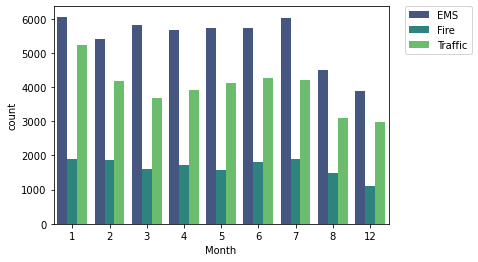

### 📊 **Вы заметили что-то странное в графике?**

_____

**Вы должны были заметить, что пропущено несколько месяцев, давайте посмотрим, сможем ли мы заполнить эту информацию, отобразив информацию другим способом, возможно, простым линейным графиком, который заполняет пропущенные месяцы, для этого нам понадобится поработать с pandas...**

In [ ]:
# Несколько месяцев отсутствует! ??,?? и ?? там нет.

### 📊 **Теперь создайте объект gropuby с именем byMonth, где вы группируете DataFrame по столбцу месяца и используете метод count() для агрегирования. Используйте метод head() для отбражения первых строк DataFrame.**

In [78]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu


In [126]:
byMonth = df.groupby(by='Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


### 📊 **Теперь создайте простой график из df, указывающий количество вызовов в месяц.**

In [90]:
byMonth = df.groupby('Month').count()['twp']


<Axes: xlabel='Month'>

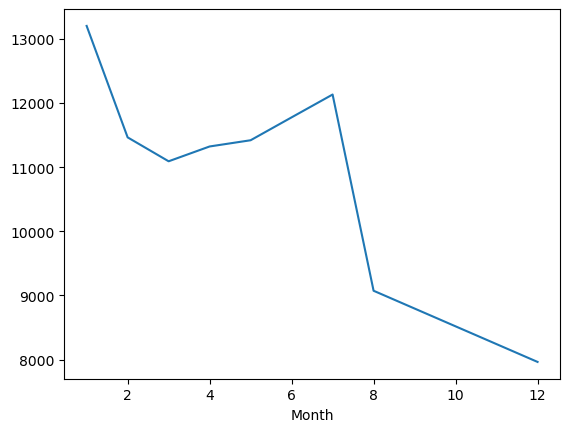

In [92]:
# Визуализация данных
#1
sns.lineplot(x=byMonth.index, y=byMonth.values)

<Axes: xlabel='Month'>

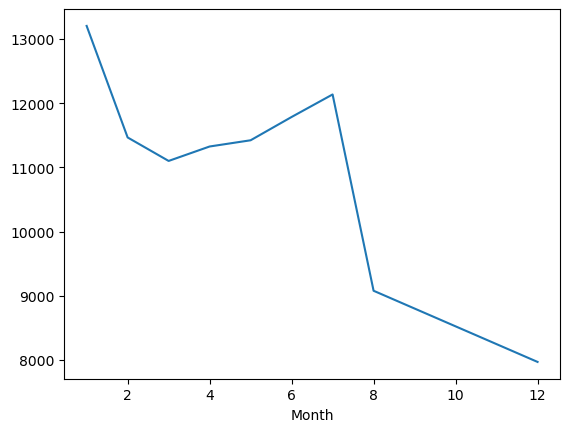

In [127]:
#2
byMonth['lat'].plot()

<AxesSubplot:xlabel='Month'>

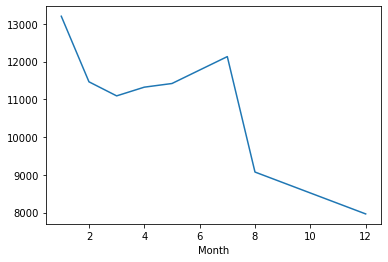

### 📊 **Теперь посмотрите, можете ли вы использовать функцию lmplot() от seaborn для создания линейной регессии на данных количества вызовов в месяц. Имейте в виду, что вам может потребоваться сбросить индекс для столбца.**

In [129]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu


In [130]:
byMonth.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467


In [133]:
byMonth.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467


In [134]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


In [141]:
byMonth.reset_index().corr()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,1.000000,-0.809286,-0.809286,-0.809286,-0.807696,-0.809286,-0.809286,-0.809455,-0.807761,-0.809286,-0.809286,-0.809286,-0.809286
lat,-0.809286,1.000000,1.000000,1.000000,0.999352,1.000000,1.000000,0.999999,0.999928,1.000000,1.000000,1.000000,1.000000
lng,-0.809286,1.000000,1.000000,1.000000,0.999352,1.000000,1.000000,0.999999,0.999928,1.000000,1.000000,1.000000,1.000000
desc,-0.809286,1.000000,1.000000,1.000000,0.999352,1.000000,1.000000,0.999999,0.999928,1.000000,1.000000,1.000000,1.000000
zip,-0.807696,0.999352,0.999352,0.999352,1.000000,0.999352,0.999352,0.999338,0.999445,0.999352,0.999352,0.999352,0.999352
title,-0.809286,1.000000,1.000000,1.000000,0.999352,1.000000,1.000000,0.999999,0.999928,1.000000,1.000000,1.000000,1.000000
timeStamp,-0.809286,1.000000,1.000000,1.000000,0.999352,1.000000,1.000000,0.999999,0.999928,1.000000,1.000000,1.000000,1.000000
twp,-0.809455,0.999999,0.999999,0.999999,0.999338,0.999999,0.999999,1.000000,0.999919,0.999999,0.999999,0.999999,0.999999
addr,-0.807761,0.999928,0.999928,0.999928,0.999445,0.999928,0.999928,0.999919,1.000000,0.999928,0.999928,0.999928,0.999928
e,-0.809286,1.000000,1.000000,1.000000,0.999352,1.000000,1.000000,0.999999,0.999928,1.000000,1.000000,1.000000,1.000000


In [142]:
byMonth.corr()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
lat,1.000000,1.000000,1.000000,0.999352,1.000000,1.000000,0.999999,0.999928,1.000000,1.000000,1.000000,1.000000
lng,1.000000,1.000000,1.000000,0.999352,1.000000,1.000000,0.999999,0.999928,1.000000,1.000000,1.000000,1.000000
desc,1.000000,1.000000,1.000000,0.999352,1.000000,1.000000,0.999999,0.999928,1.000000,1.000000,1.000000,1.000000
zip,0.999352,0.999352,0.999352,1.000000,0.999352,0.999352,0.999338,0.999445,0.999352,0.999352,0.999352,0.999352
title,1.000000,1.000000,1.000000,0.999352,1.000000,1.000000,0.999999,0.999928,1.000000,1.000000,1.000000,1.000000
timeStamp,1.000000,1.000000,1.000000,0.999352,1.000000,1.000000,0.999999,0.999928,1.000000,1.000000,1.000000,1.000000
twp,0.999999,0.999999,0.999999,0.999338,0.999999,0.999999,1.000000,0.999919,0.999999,0.999999,0.999999,0.999999
addr,0.999928,0.999928,0.999928,0.999445,0.999928,0.999928,0.999919,1.000000,0.999928,0.999928,0.999928,0.999928
e,1.000000,1.000000,1.000000,0.999352,1.000000,1.000000,0.999999,0.999928,1.000000,1.000000,1.000000,1.000000
Reason,1.000000,1.000000,1.000000,0.999352,1.000000,1.000000,0.999999,0.999928,1.000000,1.000000,1.000000,1.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


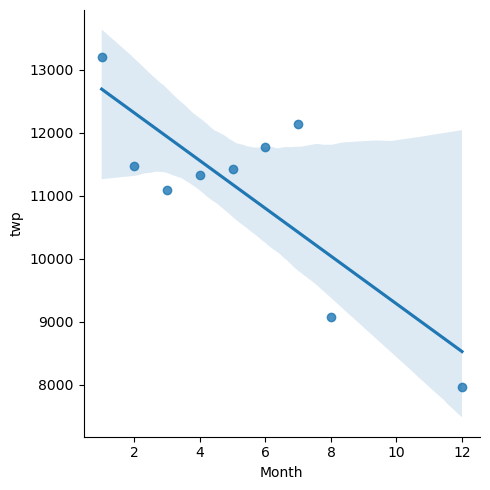

In [137]:
# Визуализация данных
sns.lmplot(data=byMonth.reset_index(), x='Month', y='twp')

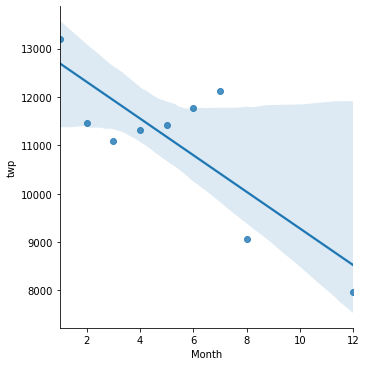

### 📊 **Создайте новый столбец с именем «Date», который содержит дату из столбца timeStamp. Вам нужно будет использовать apply() вместе с методом .date()**

In [144]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu


In [158]:
time = df['timeStamp'].iloc[0]
print(time.date())

2015-12-10


In [159]:
df['timeStamp'].apply(lambda x: x.date())

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: timeStamp, Length: 99492, dtype: object

In [160]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

In [161]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


### 📊 **Теперь сгруппируйте (groupby) этот столбец Date с агрегатом count() и создайте график подсчета вызовов службы 911. **

In [204]:
byDate = df.groupby('Date').count()
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


#### получилось, но отличие в тома что у меня есть легенда

<Axes: xlabel='Date'>

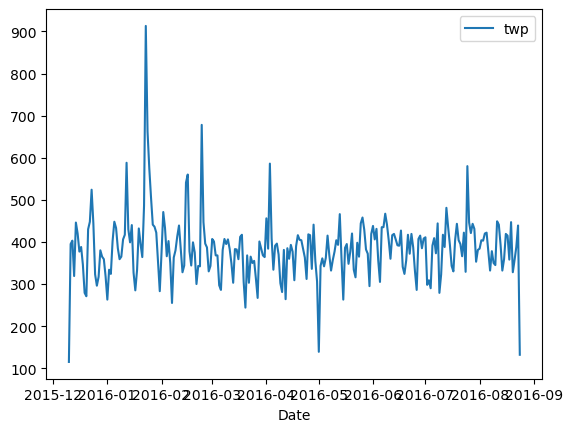

In [175]:
byDate.plot(y='twp')

<Axes: xlabel='Date'>

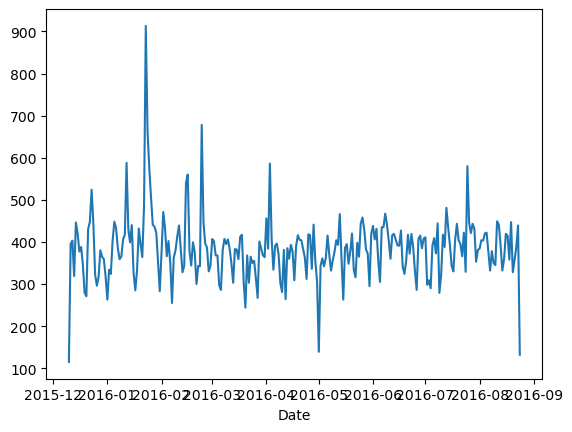

In [189]:
byDate['twp'].plot()

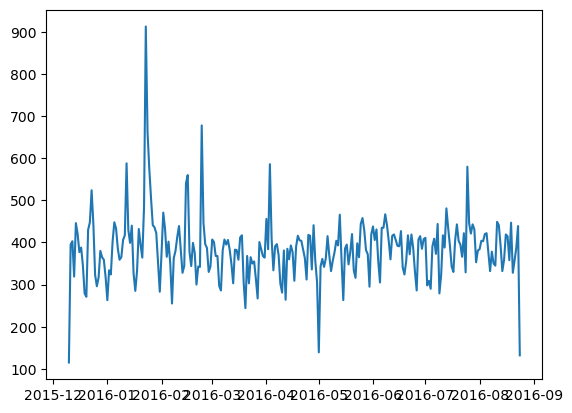

In [178]:
# Визуализация данных
plt.plot(byDate['twp'])

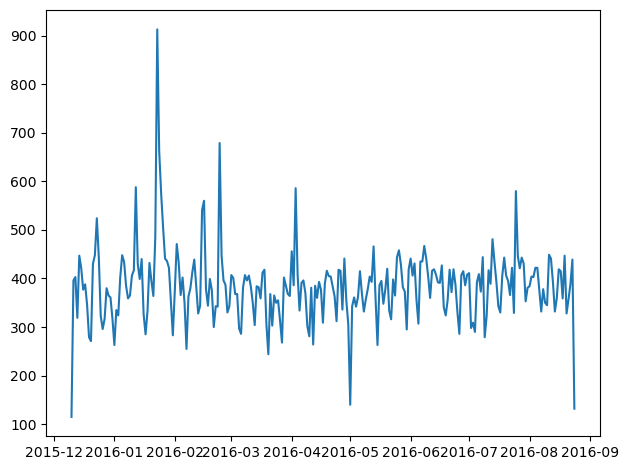

In [220]:
# Визуализация данных
plt.plot(byDate['Reason'])
plt.tight_layout()

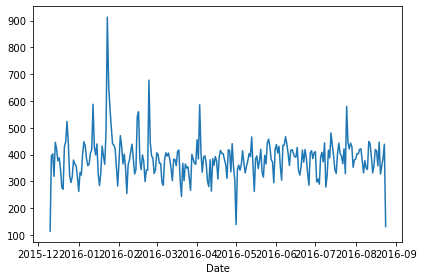

### 📊 **Теперь воссоздайте этот график, но создайте 3 отдельных графика, каждый из которых представляет собой причину вызова (Reason) службы экстренной помощи 911**

In [192]:
df[df['Reason'] == 'Traffic']

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,17,12,Thu,2015-12-10
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,MONTGOMERY,RT202 PKWY & KNAPP RD,1,Traffic,17,12,Thu,2015-12-10
11,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,PLYMOUTH,BROOK RD & COLWELL LN,1,Traffic,17,12,Thu,2015-12-10
12,40.174131,-75.098491,BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...,19040.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,UPPER MORELAND,BYBERRY AVE & S WARMINSTER RD,1,Traffic,17,12,Thu,2015-12-10
13,40.062974,-75.135914,OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...,19027.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,CHELTENHAM,OLD YORK RD & VALLEY RD,1,Traffic,17,12,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99485,40.143601,-75.427877,EAGLEVILLE RD & REDTAIL RD; LOWER PROVIDENCE; ...,19403.0,Traffic: DISABLED VEHICLE -,2016-08-24 10:57:01,LOWER PROVIDENCE,EAGLEVILLE RD & REDTAIL RD,1,Traffic,10,8,Wed,2016-08-24
99486,40.179225,-75.180572,WELSH RD & NORRISTOWN RD; HORSHAM; 2016-08-24 ...,19044.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:02:02,HORSHAM,WELSH RD & NORRISTOWN RD,1,Traffic,11,8,Wed,2016-08-24
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,Wed,2016-08-24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,Wed,2016-08-24


In [203]:
byDate_traffic = df[df['Reason'] == 'Traffic'].groupby('Date').count()
byDate_traffic

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,43,43,43,35,43,43,43,41,43,43,43,43,43
2015-12-11,141,141,141,108,141,141,141,137,141,141,141,141,141
2015-12-12,146,146,146,109,146,146,146,144,146,146,146,146,146
2015-12-13,78,78,78,54,78,78,78,76,78,78,78,78,78
2015-12-14,186,186,186,150,186,186,186,184,186,186,186,186,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,117,117,117,93,117,117,117,116,117,117,117,117,117
2016-08-21,138,138,138,105,138,138,138,133,138,138,138,138,138
2016-08-22,156,156,156,127,156,156,156,152,156,156,156,156,156


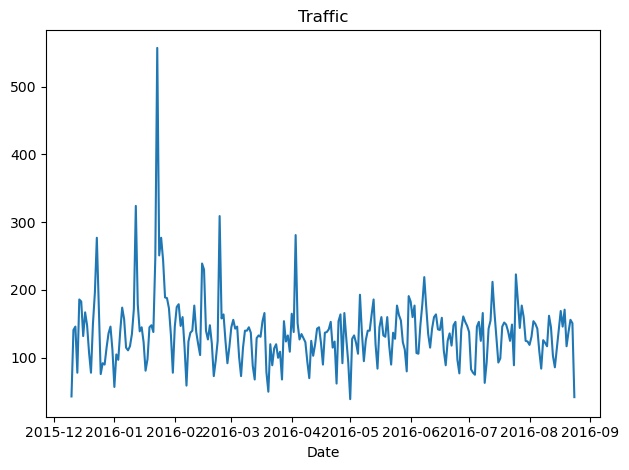

In [219]:
# Визуализация данных
byDate_traffic['Reason'].plot()
plt.title('Traffic')
plt.tight_layout()

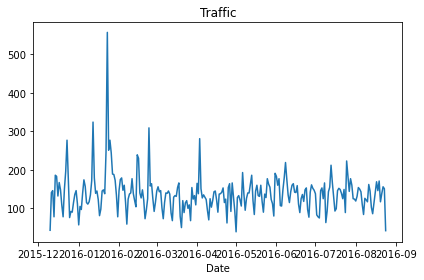

In [207]:
df[df['Reason'] == 'Fire']

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
22,40.199006,-75.300058,LILAC CT & PRIMROSE DR; UPPER GWYNEDD; 2015-12...,19446.0,Fire: APPLIANCE FIRE,2015-12-10 18:02:01,UPPER GWYNEDD,LILAC CT & PRIMROSE DR,1,Fire,18,12,Thu,2015-12-10
27,40.028903,-75.351822,EDENTON PL & DURHAM DR; DELAWARE COUNTY; 2015-...,19085.0,Fire: CARBON MONOXIDE DETECTOR,2015-12-10 18:06:25,DELAWARE COUNTY,EDENTON PL & DURHAM DR,1,Fire,18,12,Thu,2015-12-10
41,40.104206,-75.367665,HAMPTON RD & BELMONT RD; UPPER MERION; 2015-12...,19406.0,Fire: GAS-ODOR/LEAK,2015-12-10 18:37:01,UPPER MERION,HAMPTON RD & BELMONT RD,1,Fire,18,12,Thu,2015-12-10
47,40.224923,-75.528045,LINFIELD TRAPPE RD; LIMERICK; 2015-12-10 @ 18:...,19468.0,Fire: VEHICLE ACCIDENT,2015-12-10 18:52:00,LIMERICK,LINFIELD TRAPPE RD,1,Fire,18,12,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99450,40.246040,-75.601417,HERITAGE DR & CREEKSIDE DR; LOWER POTTSGROVE; ...,19464.0,Fire: FIRE ALARM,2016-08-24 09:06:02,LOWER POTTSGROVE,HERITAGE DR & CREEKSIDE DR,1,Fire,9,8,Wed,2016-08-24
99453,40.222196,-75.406875,MENSCH RD & CARRIAGE DR; SKIPPACK; 2016-08-24 ...,19473.0,Fire: VEHICLE ACCIDENT,2016-08-24 09:11:03,SKIPPACK,MENSCH RD & CARRIAGE DR,1,Fire,9,8,Wed,2016-08-24
99468,40.088355,-75.382100,DEKALB PIKE & ALLENDALE RD; UPPER MERION; 2016...,19406.0,Fire: FIRE ALARM,2016-08-24 10:12:01,UPPER MERION,DEKALB PIKE & ALLENDALE RD,1,Fire,10,8,Wed,2016-08-24
99469,40.123868,-75.341678,MARKLEY ST & JAMES ST; NORRISTOWN; 2016-08-24 ...,19401.0,Fire: FIRE ALARM,2016-08-24 10:12:01,NORRISTOWN,MARKLEY ST & JAMES ST,1,Fire,10,8,Wed,2016-08-24


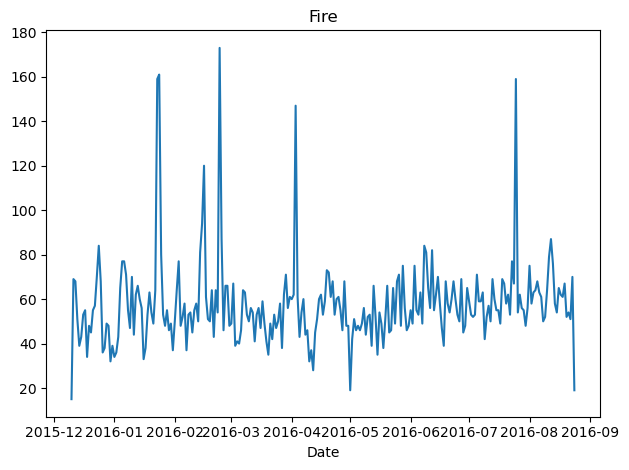

In [221]:
# Визуализация данных
byDate_fire = df[df['Reason'] == 'Fire'].groupby('Date').count()
byDate_fire['Reason'].plot()
plt.title('Fire')
plt.tight_layout()

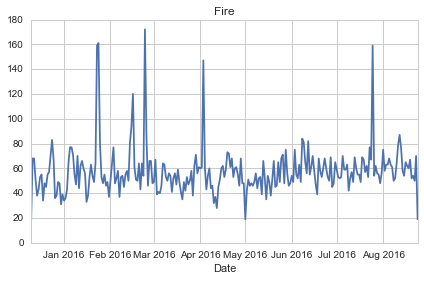

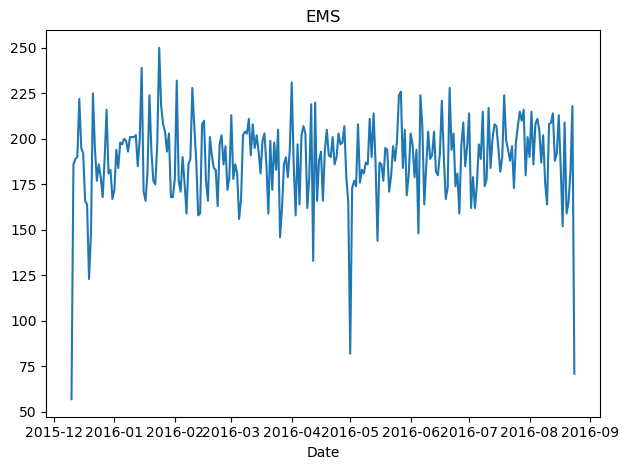

In [222]:
# Визуализация данных
byDate_ems = df[df['Reason'] == 'EMS'].groupby('Date').count()
byDate_ems['Reason'].plot()
plt.title('EMS')
plt.tight_layout()

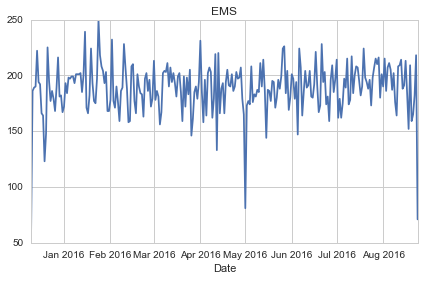

### 📊 ____
** Теперь перейдем к созданию тепловых карт с Seaborn и нашими данными. Сначала нам нужно реструктурировать дата фрейм, чтобы столбцы стали часами, а индекс стал днем недели. Есть много способов сделать это, но рекомендуем попробовать объединить groupby с [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) методом.**

#### unstack()

In [223]:
# Метод unstack() в Pandas выполняет "переворачивание" (pivoting) многомерного индекса (MultiIndex) в DataFrame. 
# Он преобразует уровни индекса в столбцы, тем самым делая DataFrame более плоским.

# Этот метод полезен, когда нужно преобразовать данные из "глубокой" структуры (с уровнями индексов) в широкую таблицу, 
# где каждый уровень индекса становится отдельным столбцом.

# unstack() берет один из уровней индекса (по умолчанию самый нижний) и преобразует его в столбцы. Если у вас многомерный 
# индекс, то уровни индексов могут быть преобразованы в несколько столбцов.
# Это обратная операция для stack(), который наоборот, преобразует столбцы в индекс.

In [ ]:
DataFrame.unstack(level=-1, fill_value=None)

Аргументы:
    
level: указывает, какой уровень индекса нужно "распаковать" и сделать столбцами. Можно указать:
Индекс уровня (например, 0, 1, 2...).
Имя уровня индекса (если индексы имеют названия).
По умолчанию level=-1, что означает, что будет распакован последний уровень индекса.

fill_value: значение для заполнения пустых ячеек, которые могут возникнуть в результате распаковки (например, если для каких-то комбинаций индексов не было значений).

In [239]:
df.groupby(['Day of Week', 'Hour'])['Reason'].count()


Day of Week  Hour
Fri          0       275
             1       235
             2       191
             3       175
             4       201
                    ... 
Wed          19      686
             20      668
             21      575
             22      490
             23      335
Name: Reason, Length: 168, dtype: int64

In [244]:
grouped = df.groupby(['Day of Week', 'Hour'])['Reason'].count().unstack() # по умолчанию самы нижний уровень индекса
grouped
# если в столб нужно было бы перевести day of week то сделали бы так:
# df.groupby(['Day of Week', 'Hour'])['Reason'].count().unstack(level='Day of Week')

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


### 📊 ** Создайте тепловую карту, используя этот новый DataFrame. **

<Axes: xlabel='Hour', ylabel='Day of Week'>

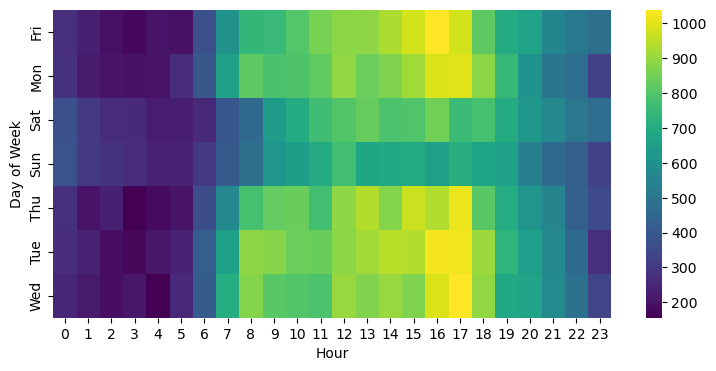

In [253]:
# Визуализация данных
plt.figure(figsize=(9, 4))
sns.heatmap(data=grouped, cmap='viridis')

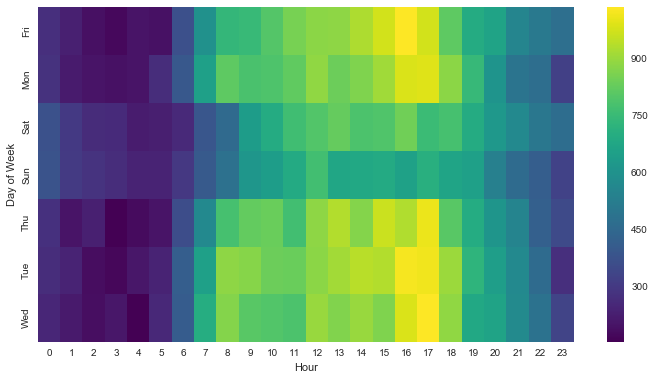

### 📊 ** Теперь создайте карту clustermap используя этот DataFrame. **

<Figure size 100x100 with 0 Axes>

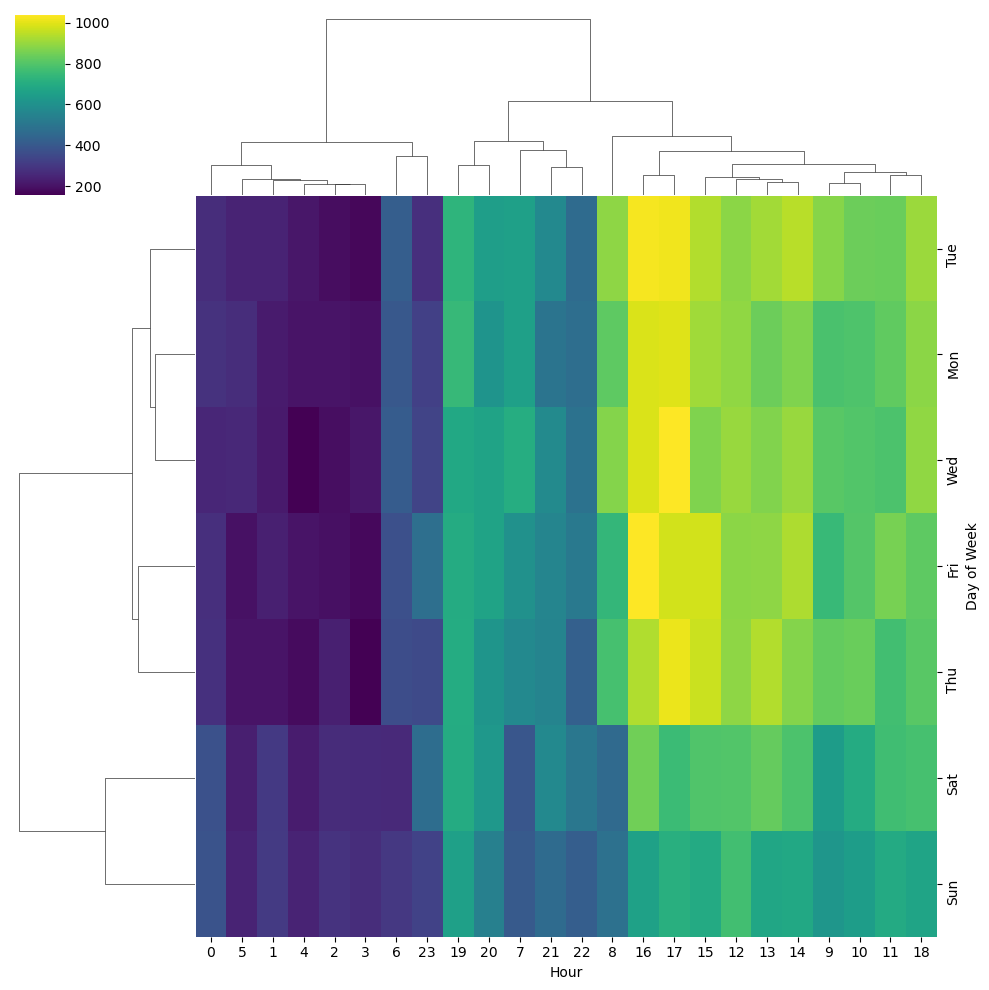

In [260]:
# Визуализация данных
plt.figure(figsize=(1, 1))   # чет ему вообще пофиг, размер не меняется
sns.clustermap(data=grouped, cmap='viridis')

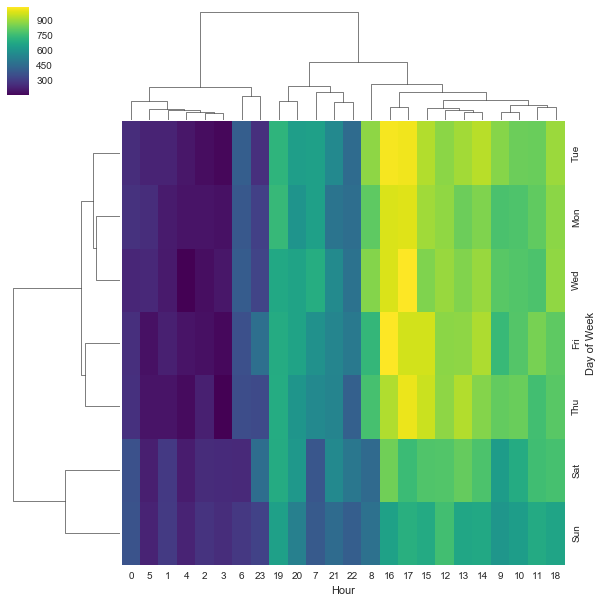

### 📊 ** Теперь повторите эти же графики и операции для DataFrame, в котором месяц отображается в виде столбца. **

In [264]:
day_month = df.groupby(['Day of Week', 'Month'])['Reason'].count()
day_month

Day of Week  Month
Fri          1        1970
             2        1581
             3        1525
             4        1958
             5        1730
                      ... 
Wed          5        1538
             6        2058
             7        1717
             8        1295
             12       1262
Name: Reason, Length: 63, dtype: int64

In [266]:
day_month.unstack().head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<Axes: xlabel='Month', ylabel='Day of Week'>

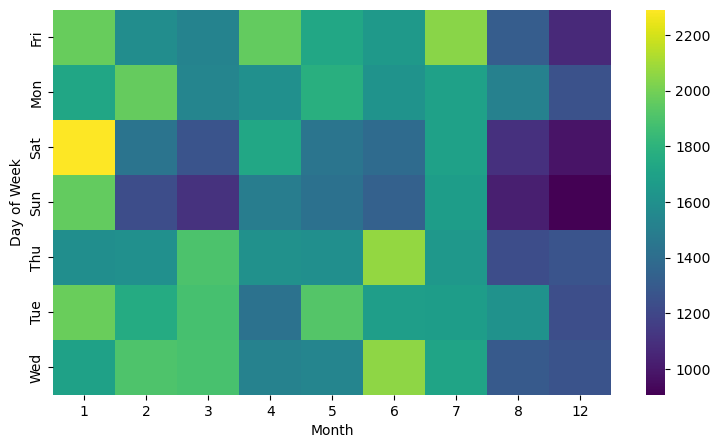

In [271]:
# Визуализация данных
plt.figure(figsize=(9, 5))
sns.heatmap(day_month.unstack(), cmap='viridis')

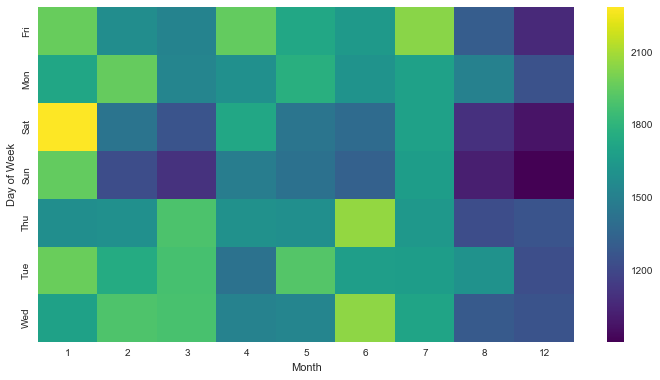

<Figure size 1000x500 with 0 Axes>

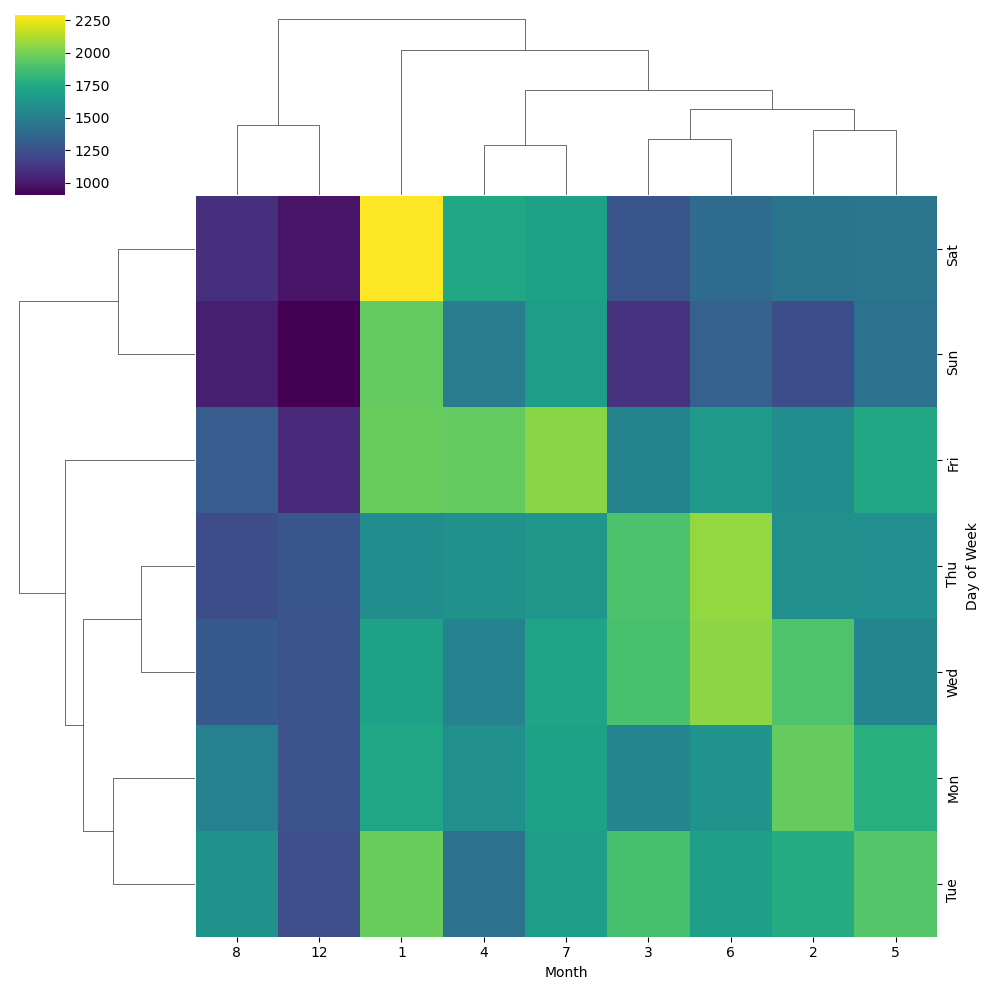

In [273]:
# Визуализация данных
plt.figure(figsize=(10,5))
sns.clustermap(day_month.unstack(), cmap='viridis')

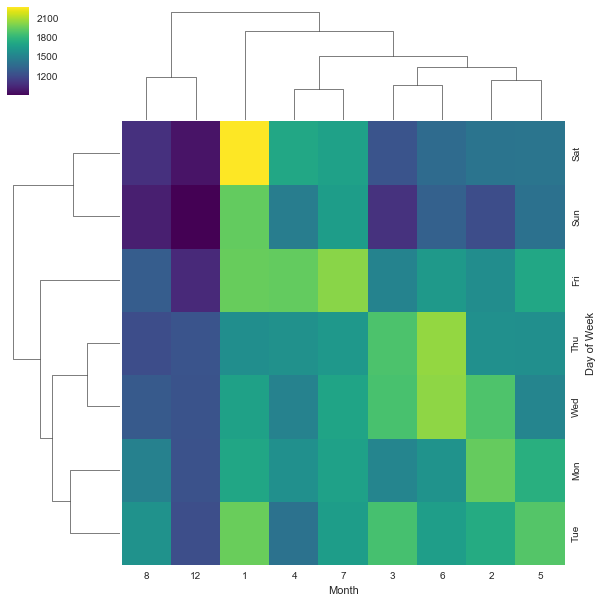

### 📊 **Продолжайте изучать Данные так, как считаете нужным!**

In [276]:
corr = df.corr(numeric_only=True)
corr

,lat,lng,zip,e,Hour,Month
lat,1.000000,-0.199432,-0.245963,NaN,-0.002966,-0.010716
lng,-0.199432,1.000000,-0.508580,NaN,-0.007088,0.011319
zip,-0.245963,-0.508580,1.000000,NaN,0.006924,-0.005482
e,NaN,NaN,NaN,NaN,NaN,NaN
Hour,-0.002966,-0.007088,0.006924,NaN,1.000000,0.017841
Month,-0.010716,0.011319,-0.005482,NaN,0.017841,1.000000


<Axes: >

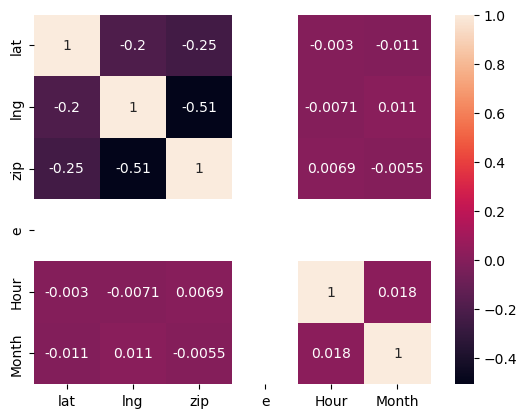

In [277]:
# Визуализация данных
sns.heatmap(data=corr, annot=True)